# GRIP : THE SPARKS FOUNDATION
## Data Science and Business Analytics Intern

### Task 1 : Prediction using Supervised ML
#### Submitted by:  CERIN THERESA DOMINIC

##### Problem1 : Predict the percentage of a student based on the no. of study hours.

##### Problem2 : What will be predicted score if a student studies for 9.25 hrs/ day?

In [1]:
#IMPORTING PACKAGES
import pandas as pd #Data manipulation
import numpy as np  #Data manipulation
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
#IMPORTING DATA
data=pd.read_excel("TASK_1.xlsx")
data.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.shape

(25, 2)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


###### Thus there are 25 rows and 2 columns for the dataset. From the initial EDA we can conclude that there doesnot exist any null values in the dataset.Also it is observed that the mean and median has no much difference that is it has not much implication. In simpler words it is not skewed. Also there is not a very large difference between maximum value and 75% thus the presence of outliers are negligable

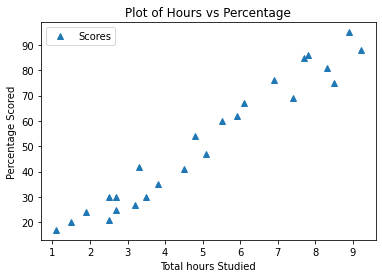

In [6]:
#PLOTTING THE DATA
data.plot(x='Hours', y='Scores', style='^')  
plt.title('Plot of Hours vs Percentage')  
plt.xlabel('Total hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

###### From the scatterplot above, it is observed that there exist a linear relation between the no of hours studied and percentage scored. This correlation between two varaibles can be validated using correlation test.

In [7]:
data.corr(method="pearson")

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


###### The correlation coefficient is 0.97 which is close to 1 and it is positive.Hence we can conclude that exist a positive linear relationship between the variables,hours studied & percentage scored. Thus as no. of hours increase,the percentage also increases.

In [8]:
#To divide the data into inputs and outputs
hours = data.iloc[:, :-1].values  
percentage = data.iloc[:, 1].values  

In [9]:
hours

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [10]:
percentage

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

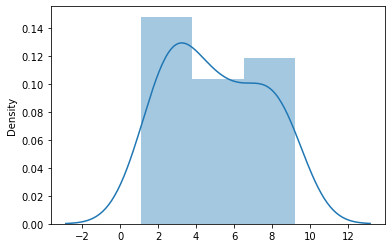

In [11]:
sns.distplot(hours)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

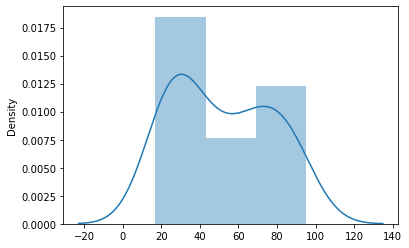

In [12]:
sns.distplot(percentage)

###### From the above distribution plot for both the variables; hours and percentage, we can say that the variables lie in a range and there are no outliers in the data.

### Modelling : Linear regression
###### Linear regression is a basic and commonly used type of predictive analysis.  The overall idea of regression is to examine two things: (1) does a set of predictor variables do a good job in predicting an outcome (dependent) variable?  (2) Which variables in particular are significant predictors of the outcome variable, and in what way do they–indicated by the magnitude and sign of the beta estimates–impact the outcome variable?  These regression estimates are used to explain the relationship between one dependent variable and one or more independent variables.  The simplest form of the regression equation with one dependent and one independent variable is defined by the formula y = c + b*x, where y = estimated dependent variable score, c = constant, b = regression coefficient, and x = score on the independent variable.

In [13]:
X = data.iloc[:, :-1].values  
Y = data.iloc[:, 1].values  

#### Train/Test data
###### Train/Test is a method to measure the accuracy of the model. It is called Train/Test because you split the the data set into two sets: a training set and a testing set. 80% for training, and 20% for testing. we train the model using the training set. we test the model using the testing set. Train the model means create the model. Test the model means test the accuracy of the model.

In [14]:
#Splitting of data into train and test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2, random_state=0) 

In [15]:
#Training the Algorithm
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 
print("Completed training the Algorithm .")

Completed training the Algorithm .


###### In linear regression sklearn finds the slope and intercept of line where all the points fall.

In [16]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_


In [17]:
# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line);
plt.show()

NameError: name 'y' is not defined

######  Here all the points doesnot lie exactly on the line, so here the line is passing through  the points in which the difference between  predicted values and actual values are minimum

In [ ]:
#Making Predictions
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

In [ ]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df 

###### Hence the above table gives us the actal and predicted values.

#### Problem2 : What will be predicted score if a student studies for 9.25 hrs/ day?

In [ ]:
#You can also test with your own data
Hours = 9.25
own_pred = regressor.predict([[Hours]])
print("No of Hours = {}".format(Hours))
print("Predicted Score = {}".format(own_pred[0]))

###### Hence from our predicted model, if a student studies 9.25 hours daily he/she may score 93.69%

### Model accuracy

In [ ]:
#Evaluating the model
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, y_pred)) 
print('Median Absolute Error:', metrics.median_absolute_error(Y_test, y_pred)) 

In [ ]:
from sklearn import metrics
from sklearn.metrics import r2_score


In [ ]:
print("R2 score : ",r2_score(Y_test,y_pred))

##### Thus the model gives a good prediction. From the R2 value we can conclude that our model prediction is 94.5% good

## THANK YOU !!!